In [1]:
# Importation des librairies
import time
import csv
from matplotlib import pyplot
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from numpy import loadtxt
from csv import reader


In [2]:
# Récupération d'un échantillion de données

compteur = 0
writer = csv.writer(open("extrait.csv", 'w', newline=''))

with open('train.csv') as f:
  csv_reader = reader(f)
  # header = next(csv_reader)
  next(csv_reader)

  # writer.writerow(header)
  for row in csv_reader:
    if (compteur < 20000):
      writer.writerow(row)
      compteur += 1
    else:
      break

  compteur = 0

with open('test.csv') as f:
  csv_reader = reader(f)
  # header = next(csv_reader)
  next(csv_reader)

  # writer.writerow(header)
  for row in csv_reader:
    if (compteur < 200):
      writer.writerow(row)
      compteur += 1
    else:
      break


In [3]:
# Début du chronometre pour la préparation de Linear regression et Random Forest
start_time = time.time()

# Chargement de l'extrait
donnees_colonne = []

with open('extrait.csv', newline='') as f:
    reader = csv.reader(f)
    donnees = list(reader) 

In [4]:
# Tri chronologique du jeu de données
donnees.sort()

# Suppression des colonnes inutiles (données chronologiques)
[i.pop(0) for i in donnees]
[i.pop(1) for i in donnees]



',
 '2009-02-03 15:49:00 UTC',
 '2009-02-03 16:46:31 UTC',
 '2009-02-03 18:58:00 UTC',
 '2009-02-03 19:38:17 UTC',
 '2009-02-03 22:14:00 UTC',
 '2009-02-04 05:56:00 UTC',
 '2009-02-04 12:00:33 UTC',
 '2009-02-04 12:15:32 UTC',
 '2009-02-05 00:18:50 UTC',
 '2009-02-05 08:18:10 UTC',
 '2009-02-05 08:44:44 UTC',
 '2009-02-05 09:46:00 UTC',
 '2009-02-05 10:53:00 UTC',
 '2009-02-05 11:29:05 UTC',
 '2009-02-05 14:53:16 UTC',
 '2009-02-05 16:02:06 UTC',
 '2009-02-05 18:27:00 UTC',
 '2009-02-05 20:11:00 UTC',
 '2009-02-05 21:05:55 UTC',
 '2009-02-05 23:20:00 UTC',
 '2009-02-06 01:41:29 UTC',
 '2009-02-06 08:58:00 UTC',
 '2009-02-06 12:04:00 UTC',
 '2009-02-06 12:33:00 UTC',
 '2009-02-06 18:58:50 UTC',
 '2009-02-06 20:42:00 UTC',
 '2009-02-06 23:31:00 UTC',
 '2009-02-07 00:05:00 UTC',
 '2009-02-07 00:14:00 UTC',
 '2009-02-07 00:32:00 UTC',
 '2009-02-07 17:50:41 UTC',
 '2009-02-07 18:29:50 UTC',
 '2009-02-07 21:53:40 UTC',
 '2009-02-07 23:56:59 UTC',
 '2009-02-08 01:13:00 UTC',
 '2009-02-08 04:3

In [5]:
# Suppresion des lignes contenant des valeurs nulles '(0)
donnees_purge = [row for row in donnees if not "0" in row]

In [6]:
# Mise en forme du jeu de données
for i in range (len(donnees_purge)):
    tampon_float = float(donnees_purge[i][0])
    tampon_int = int(tampon_float)
    donnees_purge[i][0] = str(tampon_int)

ValueError: could not convert string to float: 'fare_amount'

In [7]:
# Creation de la liste prévue pour contenur le jeu de données
with open('master.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(donnees_purge)

In [8]:
# Préparation pour les machines d'apprentissage
dataset = loadtxt('master.csv', delimiter=",")

X = dataset[:,1:6]
Y = dataset[:,0]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [10]:
# Fin du chronometre
print("--- %s seconds ---" % (time.time() - start_time))
temps_init = time.time() - start_time

--- 3.813555955886841 seconds ---


# Linear regression

In [11]:
# Démarrage du chronometre
start_time = time.time()

In [12]:
# Préparation des variables
X_train_sklearn = X_train
y_train_sklearn = y_train

In [13]:
# Entrainement du jeu de données
regr = linear_model.LinearRegression()

regr.fit(X_train_sklearn, y_train_sklearn)

y_pred = regr.predict(X_train)

print (X_train_sklearn)
print (y_train_sklearn)

[[-73.955655  40.770225 -73.972902  40.760869   2.      ]
 [-73.978824  40.772434 -73.967958  40.763359   1.      ]
 [-73.947732  40.77893  -73.966542  40.767052   6.      ]
 ...
 [-73.998613  40.744645 -74.004597  40.751822   2.      ]
 [-73.988575  40.753496 -73.980732  40.751895   1.      ]
 [-73.950913  40.783224 -73.966307  40.764835   1.      ]]
[11. 10.  8. ...  4.  5.  6.]


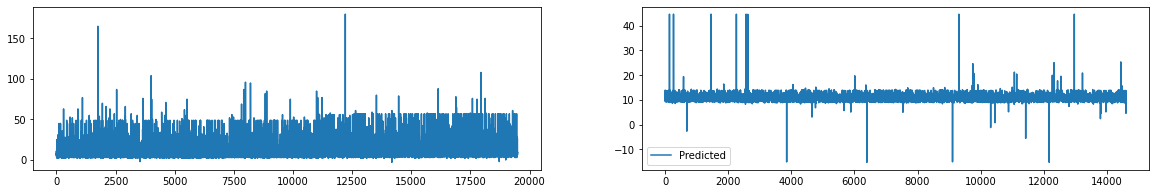

In [14]:
# Affichage de la prédition
fig, (ax1, ax2) = pyplot.subplots(1, 2,figsize=(20,3))
ax1.plot(Y, label='Expected')
ax2.plot(y_pred, label='Predicted')

pyplot.legend()
pyplot.savefig('linear_regression.png')
pyplot.show()

In [15]:
# Fin du chronometre
print("--- %s seconds ---" % (time.time() - start_time))
temps_linear_regression = time.time() - start_time

--- 3.93379545211792 seconds ---


# Random Forest

In [16]:
# Démarrage du chronometre
start_time = time.time()

In [17]:
# Préparation des variables
X_train_rf = X_train
y_train_rf = y_train

In [18]:
# Entrainement du jeu de données
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train_rf, y_train_rf)
y_pred = regressor.predict(X_train)

print (X_train_rf)
print (y_train_rf)

[[-73.955655  40.770225 -73.972902  40.760869   2.      ]
 [-73.978824  40.772434 -73.967958  40.763359   1.      ]
 [-73.947732  40.77893  -73.966542  40.767052   6.      ]
 ...
 [-73.998613  40.744645 -74.004597  40.751822   2.      ]
 [-73.988575  40.753496 -73.980732  40.751895   1.      ]
 [-73.950913  40.783224 -73.966307  40.764835   1.      ]]
[11. 10.  8. ...  4.  5.  6.]


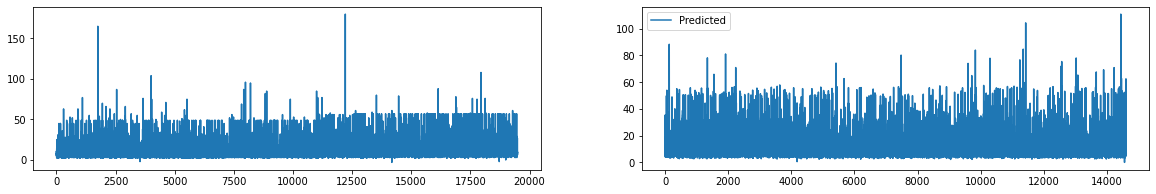

In [19]:
# Affichage de la prédition
fig, (ax1, ax2) = pyplot.subplots(1, 2,figsize=(20,3))
ax1.plot(Y, label='Expected')
ax2.plot(y_pred, label='Predicted')

pyplot.legend()
pyplot.savefig('random_forest.png')
pyplot.show()

In [20]:
# Fin du chronometre
print("--- %s seconds ---" % (time.time() - start_time))
temps_random_forest = time.time() - start_time

--- 10.949686288833618 seconds ---


# XGBRBoost

In [21]:
# Démarrage du chronometre
start_time = time.time()

In [22]:
# Chargement des données
dataset = loadtxt('master.csv', delimiter=",")

In [23]:
# Séparation dans X et y
X = dataset[:,1:6]
Y = dataset[:,0]

In [24]:
# Séparation pour le train et le test
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [25]:
# Ajout des données dans le modèle
model = XGBClassifier()
model.fit(X_train, y_train)

C:\Users\Simplon\anaconda3\envs\pandas\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[21:30:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [26]:
# Création de la prédiction
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]

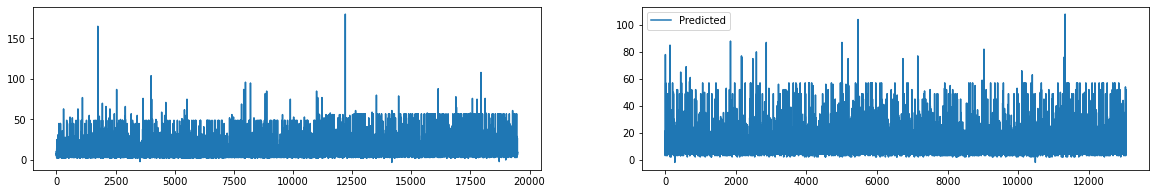

In [27]:
# Affichage de la prédition
fig, (ax1, ax2) = pyplot.subplots(1, 2,figsize=(20,3))
ax1.plot(Y, label='Expected')
ax2.plot(y_pred, label='Predicted')

pyplot.legend()
pyplot.savefig('xgbrboost.png')
pyplot.show()

In [28]:
# Fin du chronometre
print("--- %s seconds ---" % (time.time() - start_time))
temps_xgbrboost = time.time() - start_time

--- 176.72119641304016 seconds ---


## Affichage du comparatif

In [29]:
# Création de la page HTML pour la présentation des comparatifs
f = open('comparatif.html','w')

message = "<html>"
message += "    <head>"
message += "    </head>"
message += "    <body>"
message += "        <p>Comparatif des machines d' apprentissage</p></br>"
message += "        </br>"
message += "        <p>Linear Regressor</p></br>"
message += "        <img src='linear_regression.png'></br>"
message += "        Time execution : " + str(temps_init + temps_linear_regression) + "</br>"
message += "        </br>"
message += "        <p>Random Forest</p></br>"
message += "        <img src='random_forest.png'></br>"
message += "        Time execution : " + str(temps_init + temps_random_forest) + "</br>"
message += "        </br>"
message += "        </br>"
message += "        <p>Random Forest</p></br>"
message += "        <img src='xgbrboost.png'></br>"
message += "        Time execution : " + str(temps_xgbrboost) + "</br>"
message += "    </body>"
message += "</html>"

f.write(message)
f.close()